In [1]:
import pandas as pd

df = pd.read_csv('/home/jing/Desktop/Materials Project Data/MP_queried_data_featurized.csv')

df = df.dropna(subset=['formula_pretty'])

# Calculate the mean and standard deviation of the formation energy
formation_energy_mean = df['formation_energy_per_atom'].mean()
formation_energy_std = df['formation_energy_per_atom'].std()

# Define the upper and lower bounds
lower_bound = formation_energy_mean - 7 * formation_energy_std
upper_bound = formation_energy_mean + 7 * formation_energy_std

# Remove samples with formation energy outside of ±7σ 
train_data_filtered = df[(df['formation_energy_per_atom'] >= lower_bound) & (df['formation_energy_per_atom'] <= upper_bound)]

train_data_filtered.reset_index(drop=True, inplace=True)

/tmp/ipykernel_7522/2564697825.py:3: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/jing/Desktop/Materials Project Data/MP_queried_data_featurized.csv')


In [2]:
df_lowest_energy = train_data_filtered.sort_values('formation_energy_per_atom').drop_duplicates(subset=['formula_pretty', 'crystal_system'], keep='first')

df_featurized_cs = pd.get_dummies(df_lowest_energy , columns=['crystal_system'], prefix='c_s')

df_featurized_cs

,formula_pretty,symbol,number,point_group,symprec,version,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,...,Md,No,Lr,c_s_Cubic,c_s_Hexagonal,c_s_Monoclinic,c_s_Orthorhombic,c_s_Tetragonal,c_s_Triclinic,c_s_Trigonal
105769,BaGdCrFeO6,F-43m,216,-43m,0.1,2.0.2,-10.696461,-11.534161,-5.150986,0.000000,...,0,0,0,1,0,0,0,0,0,0
90178,LaF3,P-3c1,165,-3m,0.1,2.0.2,-14.288985,-14.288985,-4.510049,0.000000,...,0,0,0,0,0,0,0,0,0,1
142487,LaF3,P6_3cm,185,6mm,0.1,2.0.2,-14.288084,-14.288084,-4.509148,0.000901,...,0,0,0,0,1,0,0,0,0,0
60887,TbF3,Pnma,62,mmm,0.1,2.0.2,-14.653872,-14.653872,-4.504523,0.000000,...,0,0,0,0,0,0,1,0,0,0
47638,DyF3,Pnma,62,mmm,0.1,2.0.2,-14.839594,-14.839594,-4.501402,0.000000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76855,VReW2,Immm,71,mmm,0.1,2.0.2,-6.688421,-37.173523,5.135422,5.304934,...,0,0,0,0,0,0,1,0,0,0
21227,Ta,Cmmm,65,mmm,0.1,2.0.2,-6.712313,-43.446368,5.145465,5.145465,...,0,0,0,0,0,0,1,0,0,0
3177,TaMoW2,Immm,71,mmm,0.1,2.0.2,-6.966115,-39.150404,5.199447,5.272300,...,0,0,0,0,0,0,1,0,0,0
148102,TaNbW2,Immm,71,mmm,0.1,2.0.2,-6.768987,-38.804449,5.210925,5.261849,...,0,0,0,0,0,0,1,0,0,0


In [3]:
print(df_featurized_cs.columns.tolist())

['formula_pretty', 'symbol', 'number', 'point_group', 'symprec', 'version', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'composition', 'H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'c_s_Cubic', 'c_s_Hexagonal', 'c_s_Monoclinic', 'c_s_Orthorhombic', 'c_s_Tetragonal', 'c_s_Triclinic', 'c_s_Trigonal']


In [3]:
X = df_featurized_cs[['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 
                      'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 
                      'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 
                      'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 
                      'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 
                      'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 
                      'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 
                      'Es', 'Fm', 'Md', 'No', 'Lr', 'c_s_Cubic', 'c_s_Hexagonal', 'c_s_Monoclinic', 'c_s_Orthorhombic', 'c_s_Tetragonal', 'c_s_Triclinic', 'c_s_Trigonal']].values
y = df_featurized_cs['formation_energy_per_atom'].values

Using device: cuda
Epoch [1/500], Train Loss: 0.3138, Test Loss: 0.2185
Epoch [2/500], Train Loss: 0.2116, Test Loss: 0.2686
Epoch [3/500], Train Loss: 0.1884, Test Loss: 0.1844
Epoch [4/500], Train Loss: 0.1732, Test Loss: 0.1620
Epoch [5/500], Train Loss: 0.1607, Test Loss: 0.1535
Epoch [6/500], Train Loss: 0.1529, Test Loss: 0.1599
Epoch [7/500], Train Loss: 0.1457, Test Loss: 0.1402
Epoch [8/500], Train Loss: 0.1411, Test Loss: 0.1417
Epoch [9/500], Train Loss: 0.1362, Test Loss: 0.1316
Epoch [10/500], Train Loss: 0.1334, Test Loss: 0.1430
Epoch [11/500], Train Loss: 0.1289, Test Loss: 0.1443
Epoch [12/500], Train Loss: 0.1270, Test Loss: 0.1282
Epoch [13/500], Train Loss: 0.1242, Test Loss: 0.1371
Epoch [14/500], Train Loss: 0.1232, Test Loss: 0.1240
Epoch [15/500], Train Loss: 0.1199, Test Loss: 0.1292
Epoch [16/500], Train Loss: 0.1190, Test Loss: 0.1223
Epoch [17/500], Train Loss: 0.1170, Test Loss: 0.1161
Epoch [18/500], Train Loss: 0.1153, Test Loss: 0.1363
Epoch [19/500], Tr

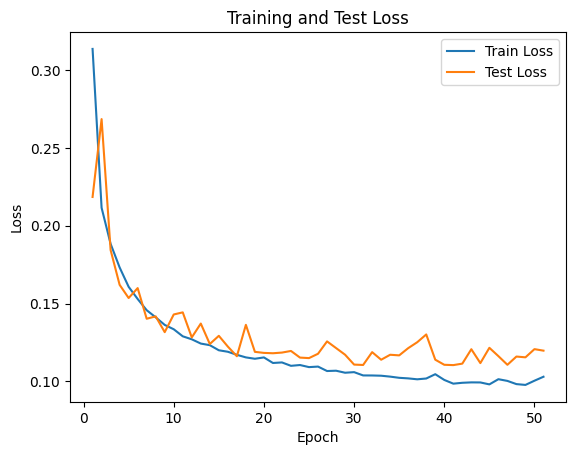

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Device initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Normalize the data
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Define model parameters
input_size = X_train.shape[1]
output_size = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = self.fc7(x)
        return x

# Create dataset and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Create an instance of the model and move it to device
model = NeuralNetwork(input_size, output_size).to(device)

# Define the loss function and optimizer
criterion = nn.L1Loss()  # Mean Absolute Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store training and testing loss
train_losses = []
test_losses = []

# Train the model with early stopping
num_epochs = 500
patience = 10  # Number of epochs to wait for improvement
best_test_loss = float('inf')
counter = 0  # Counter for patience

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    # Calculate average train loss
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    model.eval()  # Set model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            test_loss += loss.item() * inputs.size(0)

    # Calculate average test loss
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    # Check for early stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    # Print progress for every epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot the loss
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()


/home/jing/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.1197
Mean Squared Error (MSE): 0.0672
Root Mean Squared Error (RMSE): 0.2592
R-squared (R2): 0.9536


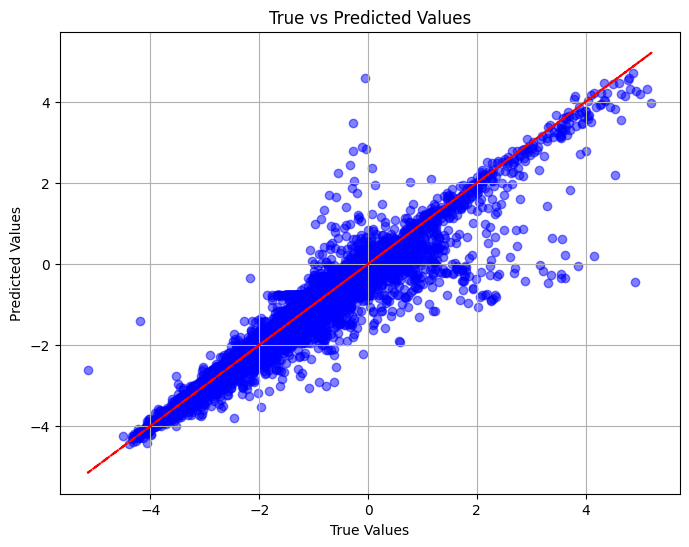

In [5]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test data
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test.to(device)).cpu().numpy()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test.cpu().numpy(), y_pred)
mse = mean_squared_error(y_test.cpu().numpy(), y_pred)
rmse = mean_squared_error(y_test.cpu().numpy(), y_pred, squared=False)
r2 = r2_score(y_test.cpu().numpy(), y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

X_test = X_test.to(device)

# Get predictions for the test set
with torch.no_grad():
    y_pred = model(X_test).cpu().numpy()

# Convert tensors back to NumPy arrays
y_true = y_test.cpu().numpy()

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.plot(y_true, y_true, color='red', linestyle='--')  # Plot y = x line for reference
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [6]:
torch.save(model.state_dict(), 'trained_model_cs.pth')